In [1]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition', 'us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

print ('done')

done


In [2]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='rekognitionbotoartifact'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
print info about this bucket
<Bucket: rekognitionbotoartifact>
0.002 GB
num files: 23
Cano1.png	12302	2017-05-30T17:38:41.000Z
beachpic.png	92369	2017-06-21T14:30:49.000Z
canoandcruz.png	102642	2017-05-30T17:38:41.000Z
canoandjayz.png	50004	2017-05-30T17:38:41.000Z
canoandreyes.png	81886	2017-05-30T17:38:42.000Z
cat_picture.png	113078	2017-06-19T20:30:25.000Z
cruz.png	18921	2017-05-30T17:38:42.000Z
danes.jpg	17248	2017-07-31T15:29:50.000Z
dog_pic.png	56996	2017-06-19T20:30:27.000Z
embiidandokafor.png	94450	2017-05-30T17:38:42.000Z
embiidandsimmons.png	161768	2017-05-30T17:38:43.000Z
foursixers.png	77603	2017-05-30T17:38:44.000Z
hinkie.png	163536	2017-05-30T17:38:44.000Z
hinkieandbrown.png	48090	2017-05-30T17:38:45.000Z
hinkieandnoel.png	316380	2017-05-30T17:38:45.000Z
hinkieandsaric.png	228041	2017-05-30T17:38:46.000Z
hinkiembiid.png	101365	2017-05-30T17:38:47.000Z
hinkieofakor.png	245820	2017-05-30T17:38:47.000Z
kbacon.jpg	24958	2017-07-31T15:29:50.000Z
running_on_beach.png	60107	20

In [3]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
import commands
count=0
failcount=0

correctAPICall=0
incorrectAPICall=0
correctHold=0
incorrectHold=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_labels( 
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
                #,'Version': '1'
            }
        }
        )
        
        #version 1: get ground truth from rekognition api
        num_api_labels=len(response['Labels'])
        results=(response['Labels'])
        print('Rekognition labels detected count: '+str(num_api_labels))
        for label in results:
            print "{Name} - {Confidence}%".format(**label)
        print('')
        
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
print('fail count '+str(failcount))

Cano1.png
Rekognition labels detected count: 9
People - 99.1165084839%
Person - 99.1165237427%
Human - 99.0937805176%
Beanie - 71.5398025513%
Cap - 71.5398025513%
Hat - 71.5398025513%
Face - 55.0758705139%
Selfie - 55.0758705139%
Baseball Cap - 53.6769866943%

beachpic.png
Rekognition labels detected count: 12
People - 99.2278594971%
Person - 99.2278671265%
Human - 99.2176971436%
Beach - 98.6355819702%
Coast - 98.6355819702%
Outdoors - 98.6355819702%
Sea - 98.6355819702%
Water - 98.6355819702%
Bikini - 93.9744262695%
Maillot - 93.9744262695%
Swimwear - 93.9744262695%
Leisure Activities - 54.0210075378%

canoandcruz.png
Rekognition labels detected count: 6
People - 98.9682693481%
Person - 98.9682922363%
Human - 98.9266357422%
Face - 64.9349136353%
Selfie - 64.9349136353%
Man - 57.6114578247%

canoandjayz.png
Rekognition labels detected count: 10
People - 99.2556610107%
Person - 99.2556610107%
Human - 99.2483825684%
Clothing - 71.4774627686%
Overcoat - 71.4774627686%
Suit - 71.4774627686

running_on_beach.png


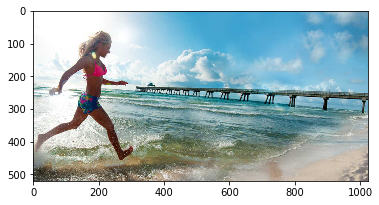

In [4]:
#retrieve and print a selected image
image='running_on_beach.png'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/MTCNN-face-filter/'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))

In [5]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='jpopbucketphoto'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
print info about this bucket
<Bucket: jpopbucketphoto>
0.052 GB
num files: 20
abundance-agriculture-bananas-batch.jpg	3938557	2017-09-17T23:59:37.000Z
action-beach-fun-leisure.jpg	3697672	2017-09-17T23:59:39.000Z
adorable-animal-breed-canine.jpg	3787202	2017-09-17T23:59:41.000Z
adventure-beautiful-blue-dawn.jpg	5758502	2017-09-17T23:59:34.000Z
alpine-calm-clouds-cold.jpg	2325857	2017-09-17T23:59:35.000Z
america-architecture-buildings.jpg	48048	2017-09-18T00:11:44.000Z
american-flag-close-up-design-flag.jpg	1317929	2017-09-18T00:11:45.000Z
apples-bananas-basket-bunch.jpg	4658681	2017-09-18T00:11:46.000Z
beach-blue-bridge-cars.jpg	5068868	2017-09-18T00:11:47.000Z
bengal-tiger-half-soak-body-on-water-during-daytime.jpg	129045	2017-09-18T00:11:48.000Z
beverage-black-coffee-business-chart.jpg	48662	2017-09-18T00:11:48.000Z
blue-bmw-sedan-near-green-lawn-grass.jpg	3218309	2017-09-18T00:11:49.000Z
close-up-of-fruits-hanging-on-tree.jpg	5213632	2017-09-18T00:11:50.000Z
crowd-in-front-of-peop

In [6]:
count=0
failcount=0


for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        newresponse = client.detect_labels( 
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
                #,'Version': '1'
            }
        }
        )
        
        #version 1: get ground truth from rekognition api
        number_api_labels=len(newresponse['Labels'])
        newresults=(newresponse['Labels'])
        print('Rekognition labels detected count: '+str(number_api_labels))
        for label in newresults:
            print "{Name} - {Confidence}%".format(**label)
        print('')
        
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
print('fail count '+str(failcount))
        


abundance-agriculture-bananas-batch.jpg
Rekognition labels detected count: 6
Market - 89.8379135132%
Produce - 89.8379135132%
Vegetable - 82.2374725342%
Fruit - 65.4008331299%
Bazaar - 58.3413543701%
Food - 52.7275543213%

action-beach-fun-leisure.jpg
Rekognition labels detected count: 7
Sport - 98.3912658691%
Surfboard - 98.3912658691%
Surfing - 98.3912658691%
Outdoors - 93.6582336426%
Sea - 93.6582336426%
Sea Waves - 93.6582336426%
Water - 93.6582336426%

adorable-animal-breed-canine.jpg
Rekognition labels detected count: 6
Animal - 99.2582702637%
Canine - 99.2582702637%
Dog - 99.2582702637%
Mammal - 99.2582702637%
Pet - 99.2582702637%
Pug - 99.2582702637%

adventure-beautiful-blue-dawn.jpg
Rekognition labels detected count: 23
Human - 99.321105957%
People - 99.3219223022%
Person - 99.3219223022%
Crest - 84.6001815796%
Mountain - 84.6001815796%
Outdoors - 84.6001815796%
Peak - 84.6001815796%
Dusk - 76.7175216675%
Sky - 76.7175216675%
Sunlight - 76.7175216675%
Sunrise - 76.7175216675%

Rekognition labels detected count: 18
Human - 99.2806167603%
People - 99.2849578857%
Person - 99.2849578857%
Army - 89.0760040283%
Military - 89.0760040283%
Soldier - 89.0760040283%
Leisure Activities - 62.2858581543%
Walking - 62.2858581543%
Military Uniform - 59.8436698914%
Outdoors - 52.4828071594%
Sand - 52.4828071594%
Soil - 52.4828071594%
Female - 52.2079544067%
Dirt Road - 51.1856193542%
Gravel - 51.1856193542%
Road - 51.1856193542%
Afro Hairstyle - 50.981628418%
Hair - 50.981628418%

sydney-opera-house-harbor-city-sunset.jpg
Rekognition labels detected count: 26
Waterfront - 83.6176986694%
City - 76.1670303345%
Downtown - 76.1670303345%
Metropolis - 76.1670303345%
Urban - 76.1670303345%
Outdoors - 63.3237190247%
River - 63.3237190247%
Water - 63.3237190247%
Bridge - 63.2647171021%
Building - 56.7312240601%
Housing - 56.7312240601%
Harbor - 55.0331306458%
Port - 55.0331306458%
Landscape - 53.2016448975%
Nature - 53.2016448975%
Scenery - 53.2016448975%
High Rise - 52.9976234436%


soldier-military-uniform-american.jpg


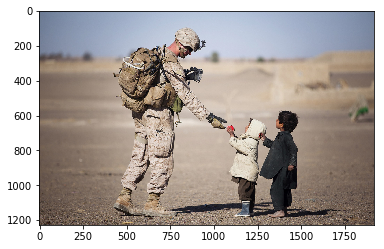

In [7]:
#retrieve and print a selected image
image='soldier-military-uniform-american.jpg'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/MTCNN-face-filter/'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))